In [1]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 4.7 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633941 sha256=88b87527e14efbd1c8b15dcd35dca2def61cbbe2a80557e12451bae313213000
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [2]:
import pandas as pd
import seaborn as sns, numpy as np

from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD, KNNBasic, accuracy
from sklearn.model_selection import TimeSeriesSplit
from surprise import Dataset, Reader

In [3]:
data = Dataset.load_builtin("ml-100k", prompt=False)

Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [4]:
df = pd.DataFrame(data.raw_ratings, columns=["userId", "movieId", "rating", "timestamp"])

In [5]:
df.head(10)

,userId,movieId,rating,timestamp
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596
5,298,474,4.0,884182806
6,115,265,2.0,881171488
7,253,465,5.0,891628467
8,305,451,3.0,886324817
9,6,86,3.0,883603013


*  Колонка **userId** - идентификаторы пользователей сайта movielens;
*  Колонка **movieId** - идентификаторы фильмов;
*  Колонка **rating** - оценки фильмов пользователями по шкале от 1 до 5;
*  Колонка **timestamp** - это время оценки фильма пользователем. Данный формат представления времени показывает, сколько секунд прошло с 1 января 1970 года.

In [6]:
df.apply("nunique")

userId         943
movieId       1682
rating           5
timestamp    49282
dtype: int64

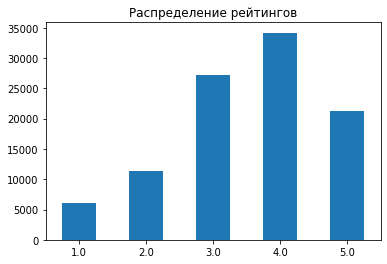

In [7]:
df["rating"].value_counts().sort_index().plot.bar(title="Распределение рейтингов", rot=0);

In [8]:
trainset, testset = train_test_split(data, test_size=0.25)

In [9]:
print('Сколько оценок в среднем поставил один человек ', df.groupby('userId')['movieId'].count().mean(), 
      'какова выборочная дисперсия этой величины', df.groupby('userId')['movieId'].count().std())

Сколько оценок в среднем поставил один человек  106.04453870625663 какова выборочная дисперсия этой величины 100.93174276633498


In [10]:
print('Сколько оценок в среднем имеет один фильм ', df.groupby('movieId')['userId'].count().mean(), 
      'дисперсия ', df.groupby('movieId')['userId'].count().std())

Сколько оценок в среднем имеет один фильм  59.45303210463734 дисперсия  80.38384561004929


In [12]:
algo = SVD()

In [13]:
algo.fit(trainset)

In [14]:
predictions = algo.test(testset)

In [15]:
testset

[('561', '141', 2.0),
 ('26', '678', 2.0),
 ('450', '511', 5.0),
 ('162', '122', 2.0),
 ('514', '357', 4.0),
 ('661', '194', 5.0),
 ('311', '511', 4.0),
 ('533', '708', 2.0),
 ('417', '562', 4.0),
 ('405', '184', 1.0),
 ('682', '352', 1.0),
 ('549', '323', 2.0),
 ('463', '302', 5.0),
 ('297', '300', 3.0),
 ('642', '258', 3.0),
 ('423', '879', 3.0),
 ('573', '632', 4.0),
 ('222', '1218', 1.0),
 ('145', '38', 3.0),
 ('563', '367', 4.0),
 ('228', '327', 1.0),
 ('363', '461', 3.0),
 ('761', '1014', 1.0),
 ('911', '622', 3.0),
 ('119', '537', 5.0),
 ('222', '35', 1.0),
 ('766', '386', 3.0),
 ('496', '96', 4.0),
 ('711', '313', 4.0),
 ('405', '470', 1.0),
 ('487', '941', 3.0),
 ('59', '1108', 3.0),
 ('835', '421', 4.0),
 ('674', '294', 4.0),
 ('606', '435', 4.0),
 ('216', '673', 4.0),
 ('636', '222', 5.0),
 ('612', '118', 3.0),
 ('416', '990', 2.0),
 ('489', '316', 5.0),
 ('592', '354', 4.0),
 ('606', '816', 2.0),
 ('429', '1112', 3.0),
 ('858', '307', 3.0),
 ('353', '328', 2.0),
 ('495', '8

In [16]:
accuracy.rmse(predictions);

RMSE: 0.9376


In [17]:
algo = SVD()
cross_validate(algo, data, measures=["RMSE", "MAE"], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9366  0.9383  0.9348  0.9353  0.9366  0.9363  0.0012  
MAE (testset)     0.7367  0.7414  0.7385  0.7346  0.7393  0.7381  0.0023  
Fit time          15.39   5.09    5.18    4.93    4.98    7.11    4.14    
Test time         0.62    0.21    0.15    0.20    0.15    0.27    0.18    


{'test_rmse': array([0.93657637, 0.93832399, 0.93475073, 0.93527293, 0.93658131]),
 'test_mae': array([0.73665211, 0.74137861, 0.73847351, 0.73463829, 0.73931659]),
 'fit_time': (15.386753559112549,
  5.091040372848511,
  5.178513526916504,
  4.929405689239502,
  4.983620882034302),
 'test_time': (0.6178085803985596,
  0.20938968658447266,
  0.14855670928955078,
  0.20461559295654297,
  0.14827489852905273)}

In [18]:
parameters = {'n_epochs':[20, 30],
              'lr_all':[0.005, 0.01],
              'reg_all':[0.02, 0.1]}

gs = GridSearchCV(SVD, parameters, measures=["RMSE", "MAE"], cv=5)
gs.fit(data)

In [19]:
gs.best_score

{'rmse': 0.913228692643148, 'mae': 0.7225354633255882}

In [20]:
parameters = {'n_epochs':[20, 30],
              'lr_all':[0.005, 0.01],
              'reg_all':[0.02, 0.1]}

gs = GridSearchCV(KNNBasic, parameters, measures=["RMSE", "MAE"], cv=5)
gs.fit(data)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [21]:
gs.best_score

{'rmse': 0.9778226864764484, 'mae': 0.7720562926503352}

In [22]:
params = gs.best_params['rmse']
KNNBasic_tuned = KNNBasic(n_epochs=params['n_epochs'], lr_all=params['lr_all'], reg_all=params['reg_all'])

In [23]:
KNNBasic_tuned.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [24]:
predictions = KNNBasic_tuned.test(testset)

In [25]:
df_predicted = pd.DataFrame(predictions)

users = []
top_3_recomendations = []
for user in df_predicted['uid'].unique():
    list_rec = df_predicted[df_predicted['uid'] == user].sort_values('est', ascending=False)[:3]['iid'].tolist()
    users.append(user)
    top_3_recomendations.append(list_rec)

df_recomendations = pd.DataFrame({'user': users,
                                  'recomendation': top_3_recomendations})

In [26]:
df_recomendations.head()

,user,recomendation
0,561,"[484, 318, 479]"
1,26,"[316, 9, 313]"
2,450,"[483, 318, 474]"
3,162,"[50, 79, 298]"
4,514,"[483, 357, 178]"


In [27]:
df_recomendations = df_recomendations.explode('recomendation')

In [28]:
# Сколько раз был рекомендован каждый фильм
df_movie_rec_num = df_recomendations.groupby('recomendation')['user'].count().reset_index().rename(columns={'user':'recomended_num',
                                                                                                            'recomendation':'movie_id'})
df_movie_rec_num.head(5)

,movie_id,recomended_num
0,1,18
1,10,3
2,100,61
3,1007,1
4,1012,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


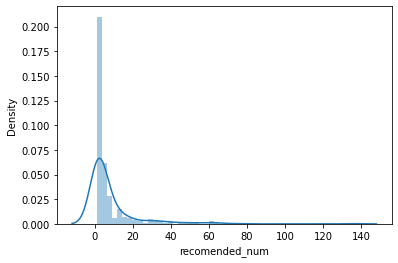

In [29]:
sns.distplot(df_movie_rec_num['recomended_num'])

In [30]:
#Не удалось реализовать ts cv. Не нашла причину ошибки.

reader=Reader(rating_scale=(1,5))
tscv = TimeSeriesSplit(n_splits = 5)
rmse = []
for train_index, test_index in tscv.split(df['timestamp']):
    #cv_train, cv_test = df.iloc[train_index], df.iloc[test_index]
    cv_train = Dataset.load_from_df(df[['userId', 'movieId', 'rating']].iloc[train_index], reader)
    cv_test = Dataset.load_from_df(df[['userId', 'movieId', 'rating']].iloc[test_index], reader)

    params = gs.best_params['rmse']
    KNNBasic_tuned = KNNBasic(n_epochs=params['n_epochs'], lr_all=params['lr_all'], reg_all=params['reg_all'])
    KNNBasic_tuned.fit(cv_train)    

    pred = KNNBasic_tuned.test(cv_test)
    true = cv_test.values
    rmse.append(sqrt(mean_squared_error(true, pred)))
    
print("RMSE: {}".format(np.mean(rmse)))

AttributeError: ignored